In [147]:
import sys
import os
current_dir = os.path.dirname(os.path.abspath('./'))
if not current_dir in sys.path:
    sys.path.append(current_dir)

import mne
from utils.preprocessing import create_events
import matplotlib.pyplot as plt
import numpy as np
from typing import *

%matplotlib qt



In [336]:
path = 'D:\\Ekaterina_Voevodina\\memory_formation\\data\\subjects\\sub2\\raw\\Encoding1_tsss_mc_trans_annotated_filtered_reconstructed.fif'
raw = mne.io.read_raw_fif(path)

Opening raw data file D:\Ekaterina_Voevodina\memory_formation\data\subjects\sub2\raw\Encoding1_tsss_mc_trans_annotated_filtered_reconstructed.fif...
    Range : 75000 ... 1016999 =     75.000 ...  1016.999 secs
Ready.


C:\Users\CCDM\AppData\Local\Temp\ipykernel_9532\883481231.py:2: RuntimeWarning: This filename (D:\Ekaterina_Voevodina\memory_formation\data\subjects\sub2\raw\Encoding1_tsss_mc_trans_annotated_filtered_reconstructed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path)


In [270]:
def create_events(event_lines: list[str],  onset: Optional[float] = 0) -> list[tuple[np.array, dict]]:
    
    event_names = list() # empty list for event names
    line_contents = list() # empry list to put lines

    for line in event_lines: 
        line_content = line.split(', ') # split lines into name of event, time, zero
        event_names.append(line_content[0]) # list the event names
        line_contents.append(line_content) # list all info about events

    unique_events = set(event_names) # sets contain only unique objects
    events_ids = dict() # empty dictionary to store info on events

    for id, event in enumerate(unique_events): # assing numbers to unique event names
        events_ids[event] = id # ????

    events = list()

    for line_content in line_contents:
        events.append([float(line_content[1]) - onset, 0, events_ids[line_content[0]]]) # events format for mne: time, 0, name)

    events = np.array(events).astype(float) #convert list to np.array

    return events, events_ids



def read_events(raw: mne.io.Raw, path: str) -> tuple[np.ndarray, dict[str, int]]:
    with open(path) as f:
        lines = f.readlines()
    events, event_ids = create_events(lines, 0)#raw._cropped_samp/1000)
    events[:, 0] *= raw.info['sfreq']
    event_ids = {
        event_name.replace('_', '/'): event_id
        for event_name, event_id in event_ids.items()
    }
    return events.astype(int), event_ids


In [271]:
eve_path = 'D:\\Ekaterina_Voevodina\\memory_formation\\data\\subjects\\sub2\\events\\Encoding1_tsss_mc_trans_all_events.txt'

events, event_ids = read_events(raw, eve_path)

In [260]:
events[0][0]

92651

In [ ]:
def split_slash(string: str) -> list[str]:
    return string.split('/')

split_slash_v2 = lambda string: string.split('/')

event_names = event_ids.keys()

event_names = map(
    split_slash,
    event_names
)

event_names = map(
    split_slash_v2,
    event_names
)

event_names = map(
    lambda string: string.split('/'),
    event_names
)


list(event_names)

In [60]:
import random
import time

data = [random.random() for _ in range(30_000_000)]

new_data = list()
start = time.perf_counter()
for elem in data:
    new_data.append(elem**3)
end = time.perf_counter()
print(f'RUNTIME: {end-start : .4} ms')

RUNTIME:  5.879 ms


In [71]:
start = time.perf_counter()
new_data = map(
    lambda x: x**3,
    data
)
end = time.perf_counter()
print(f'RUNTIME: {end-start : .4} ms')

RUNTIME:  0.1728 ms


In [63]:
start = time.perf_counter()
new_data = list(map(
    lambda x: x**3,
    data
))
end = time.perf_counter()
print(f'RUNTIME: {end-start : .4} ms')

RUNTIME:  5.186 ms


In [73]:
type(new_data)

map

In [162]:
event_names = list(event_ids.keys())

In [163]:
list(event_ids.keys())

['enc/neu/miss/sure',
 'enc/neg/miss/notsure',
 'enc/neu/hits/sure',
 'enc/neu/hits/notsure',
 'enc/hits',
 'enc/neu/hits',
 'enc/neg/hits',
 'enc/neu/miss',
 'enc/neg/miss',
 'enc/neg/hits/notsure',
 'enc/neg/miss/sure',
 'enc/neg/hits/sure',
 'enc/neu/miss/notsure',
 'enc/miss']

In [85]:
data = [(1, 'asfafs'), (2, 'qafwehr'), (3, 'asfrqweg'), (1, 'savfsda'), (2, 'asfsfqw'), (1, 'asgfsdd')]

new_data = list()
for elem in data:
    if elem[0] == 1:
        new_data.append(elem)
new_data

[(1, 'asfafs'), (1, 'savfsda'), (1, 'asgfsdd')]

In [88]:
new_data = filter(
    lambda elem: elem[0] == 1, # returns either True or False
    data
)
list(new_data)

[(1, 'asfafs'), (1, 'savfsda'), (1, 'asgfsdd')]

In [164]:
event_names = list(filter(
    lambda event: len(event.split('/')) == 4,
    event_ids.keys()
))

event_ids_mod = {
    event_name: event_id
    for event_name, event_id in event_ids.items()
    if event_name in event_names
}



In [350]:
event_ids_mod = dict(
    filter(
        lambda item: len(item[0].split('/')) == 4,
        event_ids.items()
    )
)

event_ids_mod

{'enc/neu/miss/sure': 0,
 'enc/neg/miss/notsure': 1,
 'enc/neu/hits/sure': 2,
 'enc/neu/hits/notsure': 3,
 'enc/neg/hits/notsure': 9,
 'enc/neg/miss/sure': 10,
 'enc/neg/hits/sure': 11,
 'enc/neu/miss/notsure': 12}

In [165]:
selected_event_ids = event_ids_mod.values()

In [166]:
selected_event_ids

dict_values([0, 1, 2, 3, 9, 10, 11, 12])

In [192]:
events[0]

array([242651,      0,     12])

In [272]:
events_selected = np.array(list(filter(
    lambda row: row[2] in selected_event_ids,
    events
))) 

In [196]:
raw._cropped_samp

75000

In [ ]:
events[:, 0] - raw._cropped_samp

In [202]:
last_sample_with_onset = raw.times[-1]*raw.info['sfreq'] + raw._cropped_samp
last_sample_with_onset

1016999.0

In [265]:
event_ids_mod

{'enc/neu/miss/sure': 0,
 'enc/neg/miss/notsure': 1,
 'enc/neu/hits/sure': 2,
 'enc/neu/hits/notsure': 3,
 'enc/neg/hits/notsure': 9,
 'enc/neg/miss/sure': 10,
 'enc/neg/hits/sure': 11,
 'enc/neu/miss/notsure': 12}

In [273]:
events_selected

array([[ 167651,       0,      12],
       [ 173500,       0,       0],
       [ 179131,       0,       1],
       [ 185012,       0,       0],
       [ 190711,       0,      11],
       [ 196259,       0,      10],
       [ 201941,       0,      11],
       [ 207472,       0,       0],
       [ 213186,       0,      11],
       [ 218718,       0,      12],
       [ 224717,       0,      11],
       [ 230598,       0,      11],
       [ 236263,       0,      10],
       [ 242077,       0,      11],
       [ 247692,       0,      11],
       [ 253307,       0,      12],
       [ 258870,       0,       0],
       [ 264853,       0,       1],
       [ 270385,       0,      11],
       [ 276049,       0,       9],
       [ 281881,       0,       2],
       [ 287812,       0,       0],
       [ 293560,       0,      11],
       [ 299242,       0,       2],
       [ 305073,       0,      12],
       [ 310821,       0,      11],
       [ 316370,       0,      11],
       [ 321967,       0,   

Channels marked as bad:
none


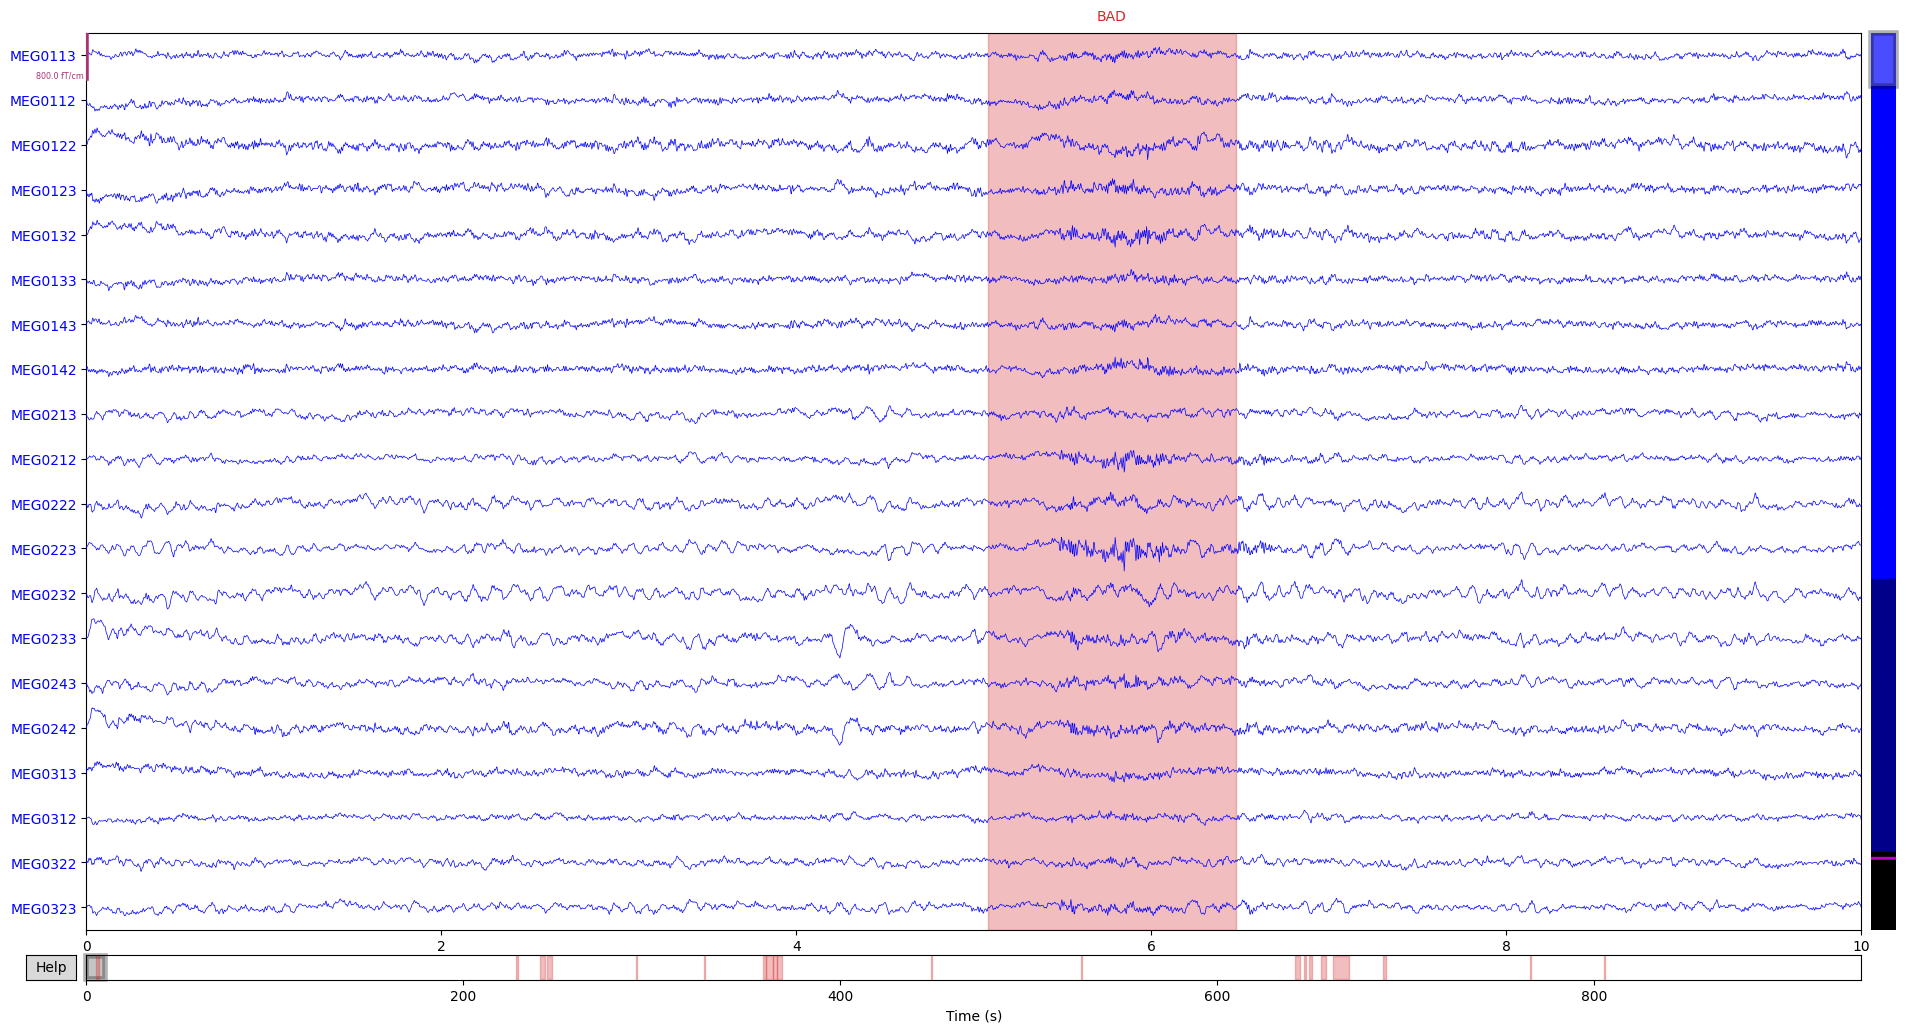

Channels marked as bad:
none


In [274]:
%matplotlib qt
raw.plot(events=events_selected)#, event_id=event_ids_mod)

In [337]:
epochs = mne.Epochs(
    raw,
    events_selected,
    event_ids_mod,
    tmin=-1.5, tmax=4.5,
    # baseline=(3.5, 4.),
    baseline=(-.5, .0),
    reject_by_annotation=True
)

Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


In [338]:
epochs

Number of events,120
Events,enc/neg/hits/notsure: 2enc/neg/hits/sure: 35enc/neg/miss/notsure: 9enc/neg/miss/sure: 12enc/neu/hits/notsure: 5enc/neu/hits/sure: 22enc/neu/miss/notsure: 15enc/neu/miss/sure: 20
Time range,-1.500 – 4.500 sec
Baseline,-0.500 – 0.000 sec


In [340]:
epochs.load_data().resample(200)

Loading data for 120 events and 6001 original time points ...
14 bad epochs dropped


Number of events,106
Events,enc/neg/hits/notsure: 2enc/neg/hits/sure: 31enc/neg/miss/notsure: 9enc/neg/miss/sure: 11enc/neu/hits/notsure: 5enc/neu/hits/sure: 16enc/neu/miss/notsure: 13enc/neu/miss/sure: 19
Time range,-1.500 – 4.495 sec
Baseline,-0.500 – 0.000 sec


In [341]:
print(epochs)

<Epochs |  106 events (all good), -1.5 - 4.495 sec, baseline -0.5 – 0 sec, ~330.3 MB, data loaded,
 'enc/neu/miss/sure': 19
 'enc/neg/miss/notsure': 9
 'enc/neu/hits/sure': 16
 'enc/neu/hits/notsure': 5
 'enc/neg/hits/notsure': 2
 'enc/neg/miss/sure': 11
 'enc/neg/hits/sure': 31
 'enc/neu/miss/notsure': 13>


In [343]:
epochs_hit = epochs['hits']
epochs_miss = epochs['miss']

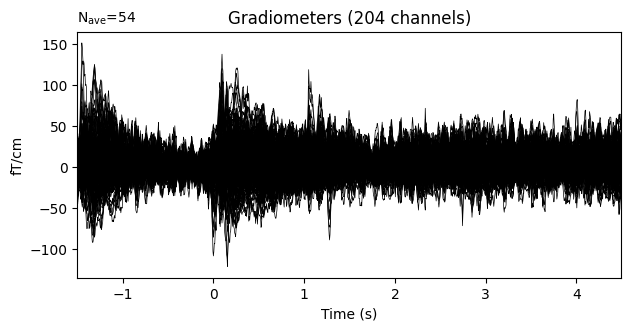

Channels marked as bad:
none


In [345]:
epochs_hit.copy().pick_types(meg='grad').average().plot()

In [216]:
print(epochs_miss)

<Epochs |  46 events (all good), -1.5 - 4.5 sec, baseline 3.5 – 4 sec, ~5.2 MB, data not loaded,
 'enc/neu/miss/sure': 17
 'enc/neg/miss/notsure': 9
 'enc/neg/miss/sure': 8
 'enc/neu/miss/notsure': 12>


In [ ]:
epochs_miss.save('/some/path/to/epochs')

In [217]:
evo_hit = epochs_hit.average()

In [319]:
raw.resample(200)

585 events found
Event IDs: [ 10  20  30 100 192 200]
585 events found
Event IDs: [ 10  20  30 100 192 200]


<Raw | Encoding1_tsss_mc_trans_annotated_filtered_reconstructed.fif, 335 x 188400 (942.0 s), ~486.7 MB, data loaded>

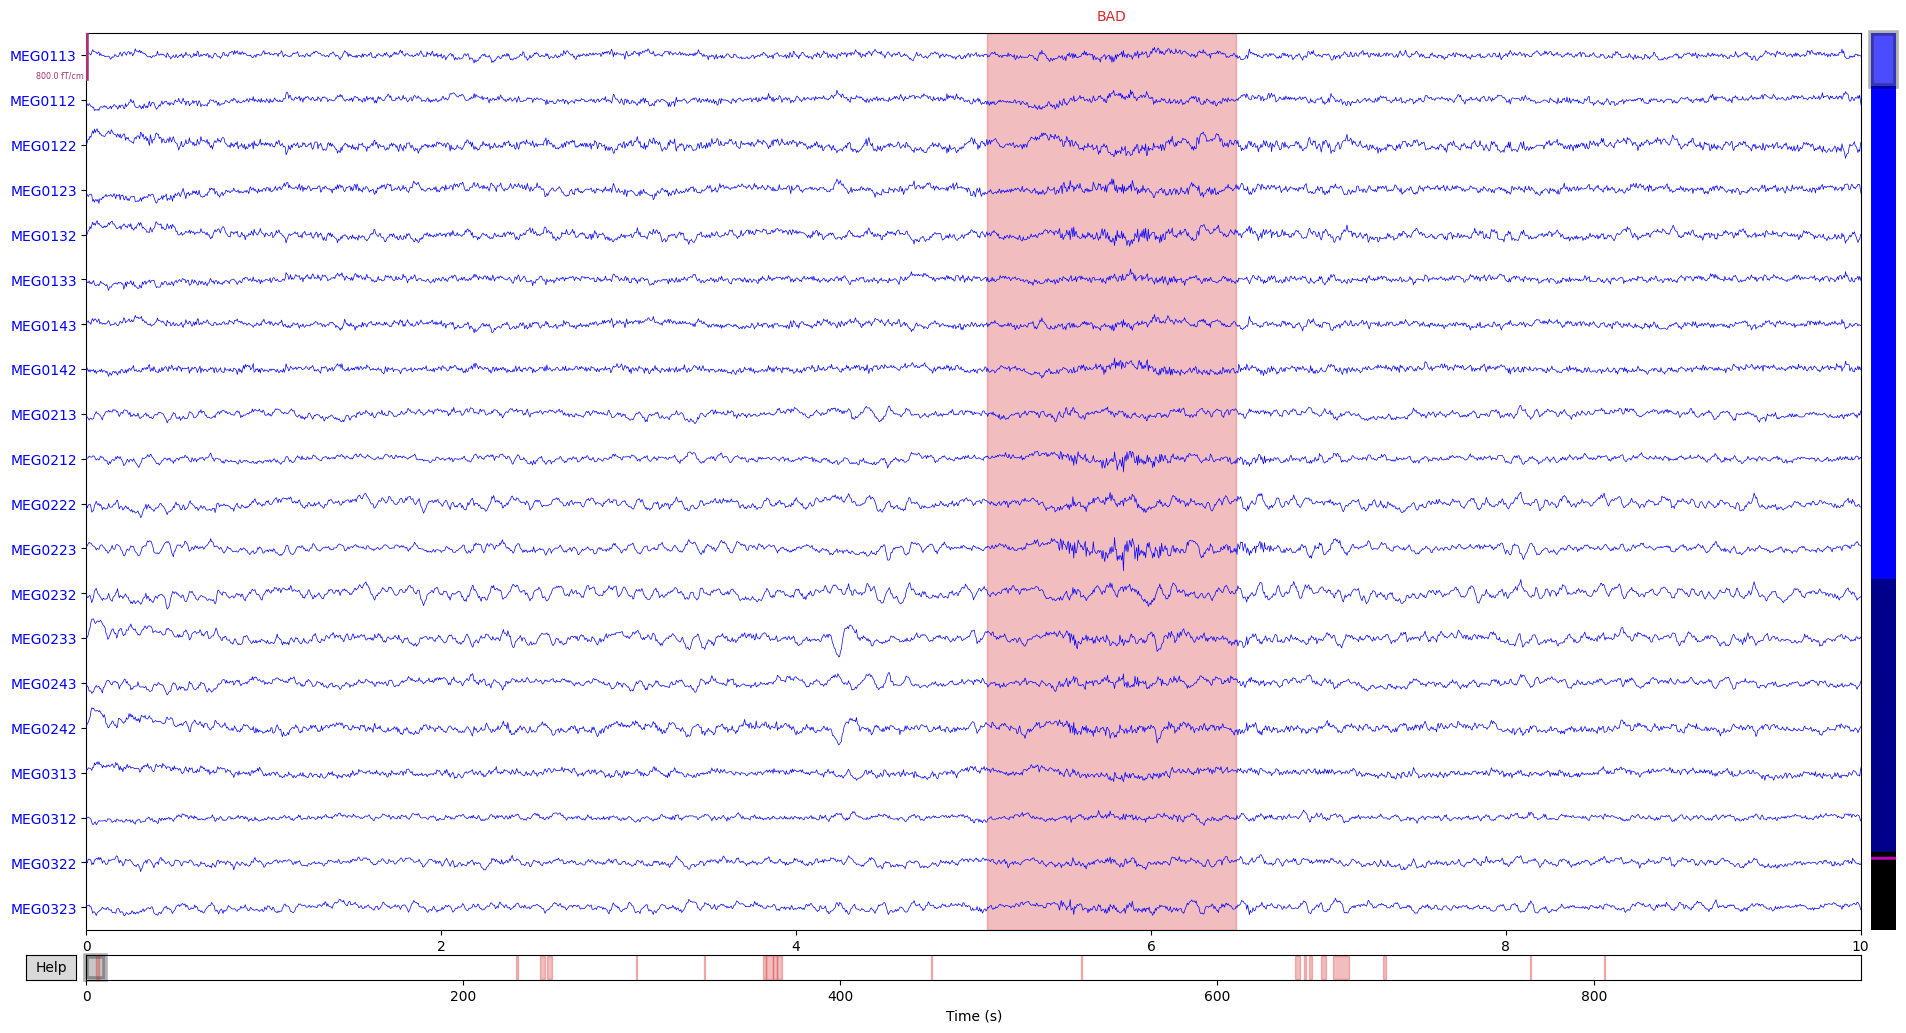

In [335]:
%matplotlib qt
raw.plot(events=events_selected)

In [333]:

epochs = mne.Epochs(
    raw,
    events_selected,
    event_ids_mod,
    tmin=-1.5, tmax=4.5,
    # baseline=(3.5, 4.),
    baseline=(-.5, -.0),
    reject_by_annotation=True
)


# hits_grad_evo = epochs.load_data().copy().pick_types(meg='grad')['hits'].average()
# %matplotlib inline
# fig = hits_grad_evo.plot()

Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


In [332]:
print(epochs)

<Epochs |  6 events (all good), -1.5 - 4.5 sec, baseline -0.5 – -0 sec, ~23.6 MB, data loaded,
 'enc/neu/miss/sure': 2
 'enc/neg/miss/notsure': 1
 'enc/neu/hits/sure': 0
 'enc/neu/hits/notsure': 0
 'enc/neg/hits/notsure': 0
 'enc/neg/miss/sure': 1
 'enc/neg/hits/sure': 2
 'enc/neu/miss/notsure': 0>


In [331]:
epochs

Number of events,6
Events,enc/neg/hits/notsure: 0enc/neg/hits/sure: 2enc/neg/miss/notsure: 1enc/neg/miss/sure: 1enc/neu/hits/notsure: 0enc/neu/hits/sure: 0enc/neu/miss/notsure: 0enc/neu/miss/sure: 2
Time range,-1.500 – 4.500 sec
Baseline,-0.500 – -0.000 sec


In [328]:
epo_grad_hits = epochs['enc/neu/miss/sure']
print(epo_grad_hits)

<Epochs |  2 events (all good), -1.5 - 4.5 sec, baseline -0.5 – -0 sec, ~11.4 MB, data loaded,
 'enc/neu/miss/sure': 2>


In [360]:
def encode_event(event_name: str) -> int:
    encoder = {
        'enc': '1',
        'neg': '1',
        'neu': '0',
        'hits': '1',
        'miss': '0',
        'sure': '1',
        'notsure': '0'
    }
    return int(''.join([encoder.get(event_group, '0') for event_group in event_name.split('/')]))

encode_event('enc/neg/hits/notsure')

def decode_event(event_id: int) -> str:
    ...


'1110'

In [359]:
epochs

Number of events,106
Events,enc/neg/hits/notsure: 2enc/neg/hits/sure: 31enc/neg/miss/notsure: 9enc/neg/miss/sure: 11enc/neu/hits/notsure: 5enc/neu/hits/sure: 16enc/neu/miss/notsure: 13enc/neu/miss/sure: 19
Time range,-1.500 – 4.495 sec
Baseline,-0.500 – 0.000 sec


In [358]:
s = 'asasfasaffas'
hash(s)

3042215423665358364

In [353]:
epo_grad_hits.average().comment.replace('/', '_')

'enc_neu_miss_sure'

In [297]:
%matplotlib qt
fig = hits_grad_evo.plot_topo()

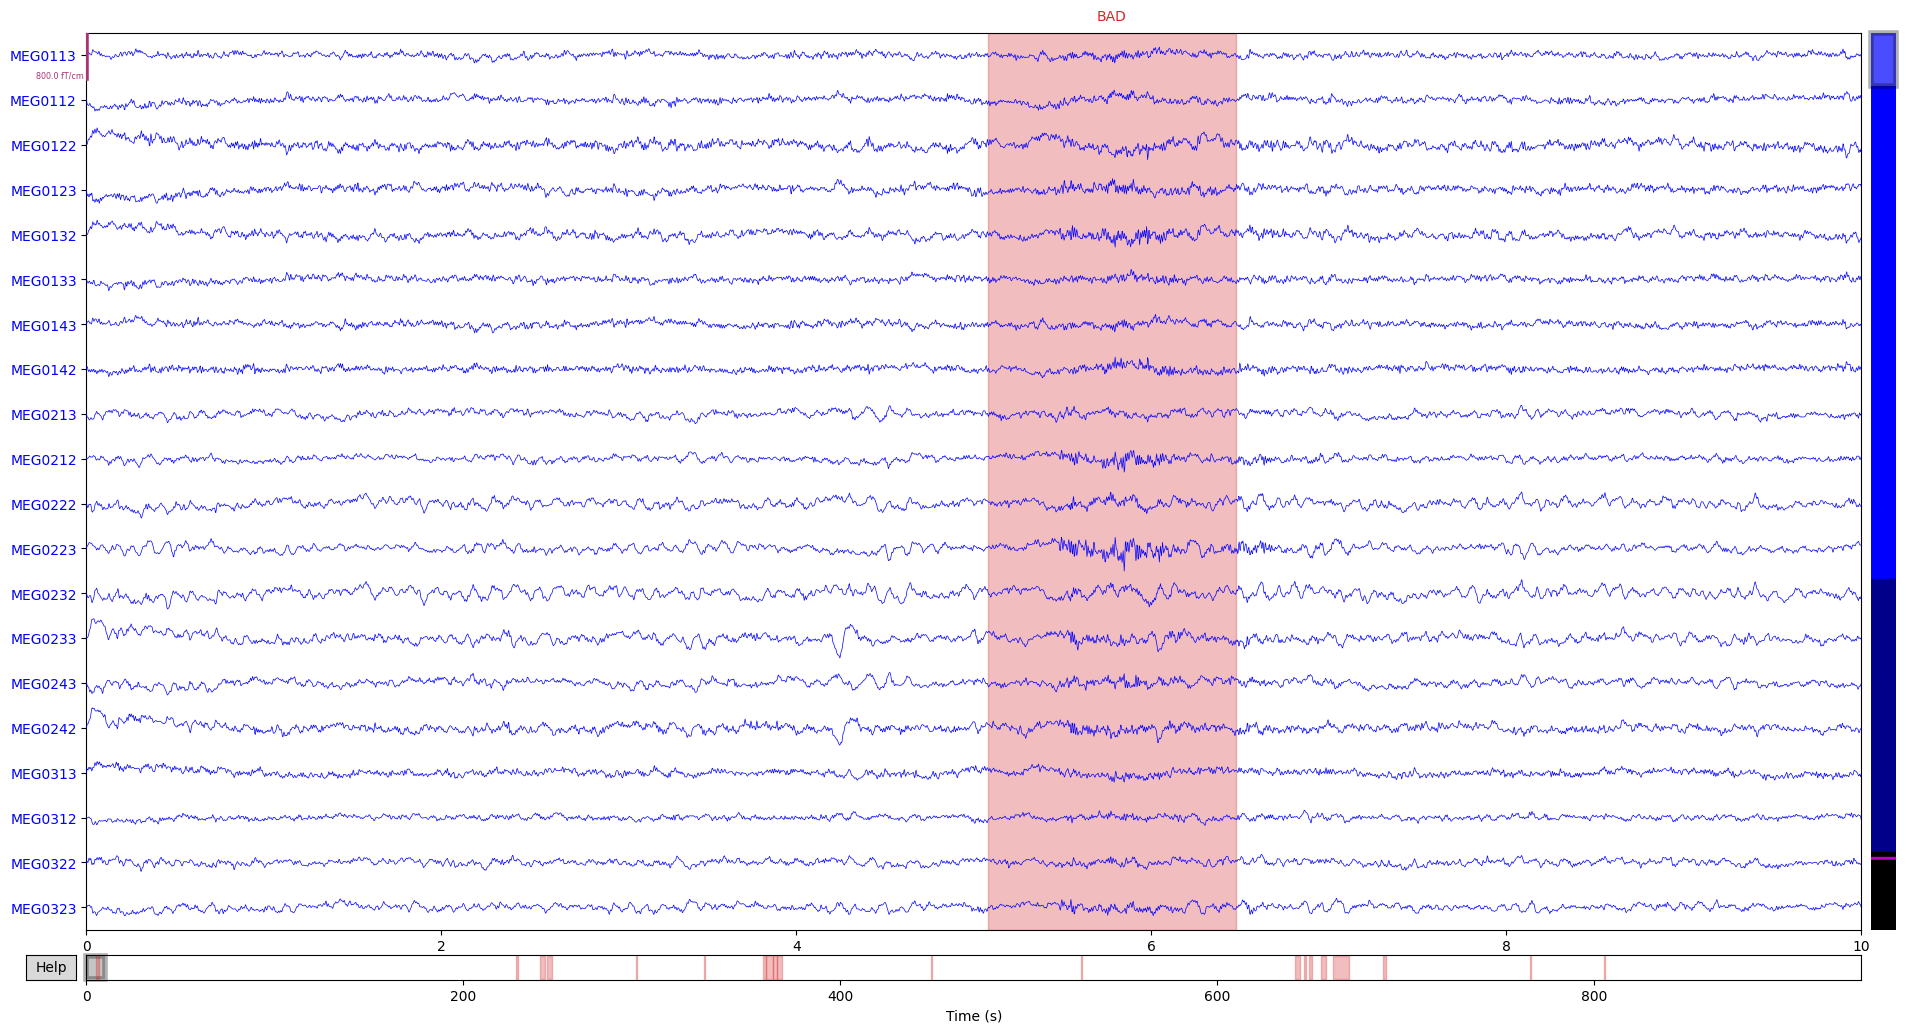

In [303]:
%matplotlib qt
raw.plot()

In [310]:
evokeds = epochs.average(by_event_type=True)

In [311]:
len(evokeds)

8

enc/neu/miss/sure


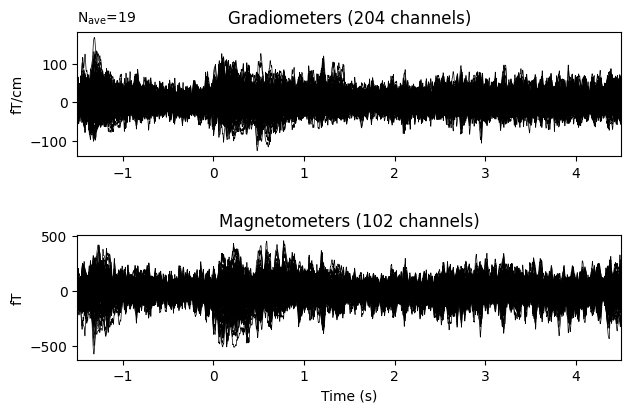

enc/neg/miss/notsure


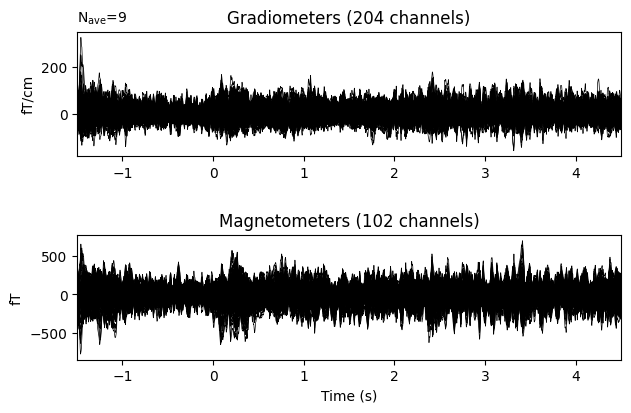

enc/neu/hits/sure


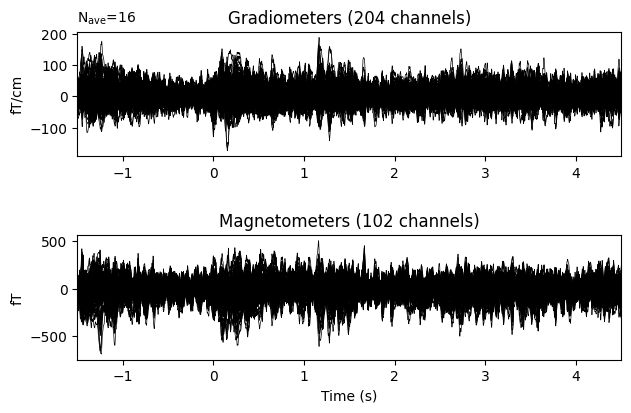

enc/neu/hits/notsure


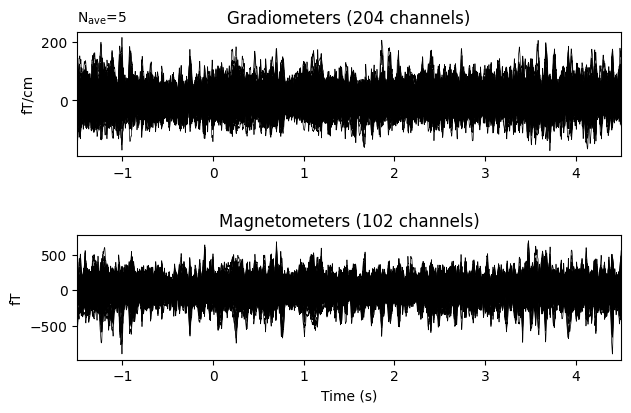

enc/neg/hits/notsure


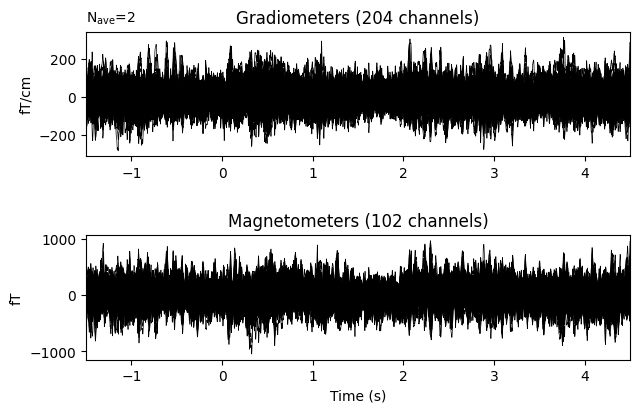

enc/neg/miss/sure


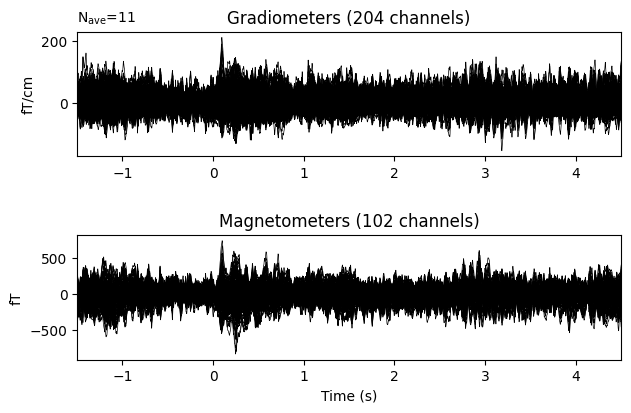

enc/neg/hits/sure


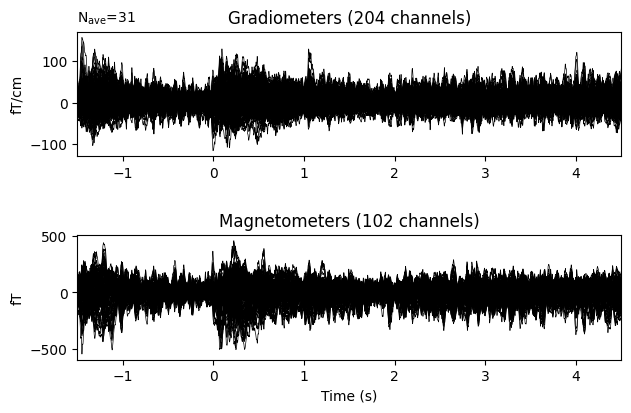

enc/neu/miss/notsure


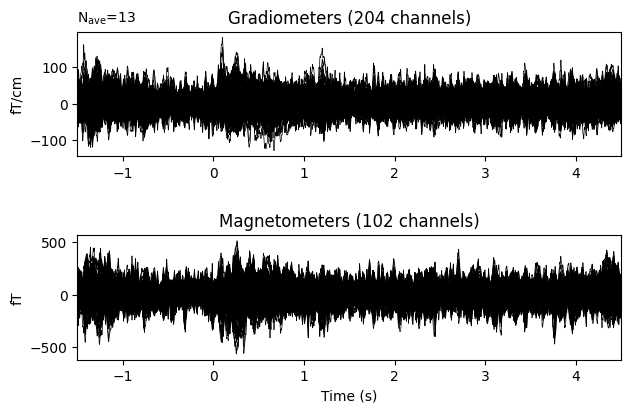

In [316]:
%matplotlib inline

for evoked in evokeds:
    print(evoked.comment)
    evoked.plot()
    plt.show()